Name:- Pratham Saini
InternshipID:-H2HBABBA2730
House:- Emily

In [1]:
#importing basic librarires :)
import pandas as pd
from sklearn.feature_selection import VarianceThreshold 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler
from datetime import date
from matplotlib import pyplot 
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_rows', 500)

In [2]:
# reading csv files  :)
df=pd.read_csv(r'C:\Users\Pratham Saini\Desktop\H2HBABBA2730.csv')
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200707822,PUBLI corporation,2019-07-29 00:00:00,2019.0,1.929620e+09,2019-07-14,20190714,20190714,20190729.0,USD,RV,1.0,NaN,93401.66,20190714.0,NAA8,1.929620e+09,0
1,U001,0200769623,WAL-MAR trust,2019-07-08 00:00:00,2019.0,1.929539e+09,2019-06-25,20190625,20190625,20190710.0,USD,RV,1.0,NaN,15238.56,20190625.0,NAH4,1.929539e+09,0
2,U001,0200759878,SA trust,2019-11-04 00:00:00,2019.0,1.930015e+09,2019-10-17,20191015,20191017,20191101.0,USD,RV,1.0,NaN,14545.47,20191017.0,NAH4,1.930015e+09,0
3,U001,0200769623,WAL-MAR corp,NaN,2020.0,1.930605e+09,2020-03-05,20200305,20200305,20200320.0,USD,RV,1.0,NaN,27866.20,20200305.0,NAH4,1.930605e+09,1
4,U001,0200769623,WAL-MAR corporation,NaN,2020.0,1.930688e+09,2020-03-24,20200323,20200324,20200408.0,USD,RV,1.0,NaN,61088.15,20200324.0,NAH4,1.930688e+09,1


In [3]:
#total rows and columns are :)
df.shape

(50000, 19)

In [4]:
#dropping all the columns which are null or are of no use to us in building this model:- :)
df=df.drop(['area_business','document type','business_code','doc_id','document_create_date.1','posting_id'],axis=1)  #6 columns are removed

In [5]:
df.shape

(50000, 13)

In [6]:
#copying values to a dataframe where clear_date is null i.e Test set :)
test=df[df['clear_date'].isnull()].reset_index(drop=True)
test.shape

(10000, 13)

In [7]:
#copying test to a new dataframe so that we can use it in prediction
newTest=test.copy()
newTest.head()

,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,0200769623,WAL-MAR corp,NaN,2020.0,2020-03-05,20200305,20200320.0,USD,27866.20,20200305.0,NAH4,1.930605e+09,1
1,0200769623,WAL-MAR corporation,NaN,2020.0,2020-03-24,20200323,20200408.0,USD,61088.15,20200324.0,NAH4,1.930688e+09,1
2,0200799367,MCL foundation,NaN,2020.0,2020-03-04,20200304,20200319.0,USD,70262.73,20200304.0,NAA8,1.930599e+09,1
3,CCCA02,KRAFT trust,NaN,2020.0,2020-03-08,20200306,20200412.0,USD,47809.68,20200308.0,NAG2,1.930615e+09,1
4,0200803720,DEC corporation,NaN,2020.0,2020-04-10,20200410,20200424.0,USD,2403.92,20200401.0,NAM4,1.930773e+09,1


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cust_number           10000 non-null  object 
 1   name_customer         10000 non-null  object 
 2   clear_date            0 non-null      object 
 3   buisness_year         10000 non-null  float64
 4   posting_date          10000 non-null  object 
 5   document_create_date  10000 non-null  int64  
 6   due_in_date           10000 non-null  float64
 7   invoice_currency      10000 non-null  object 
 8   total_open_amount     10000 non-null  float64
 9   baseline_create_date  10000 non-null  float64
 10  cust_payment_terms    10000 non-null  object 
 11  invoice_id            10000 non-null  float64
 12  isOpen                10000 non-null  int64  
dtypes: float64(5), int64(2), object(6)
memory usage: 1015.8+ KB


In [9]:
# making training set with values of clear_date that are not null and reseting the index :)
df=df[df['clear_date'].notnull()].reset_index(drop=True)
df=df.sort_values(by=r'document_create_date',ascending=True).reset_index(drop=True)
df.shape

(40000, 13)

In [10]:
#so given below is the dataset to procede further pre-processing
df.head()

,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,0100046614,PRO associates,2019-03-11 00:00:00,2019.0,2018-12-30,20181226,20190129.0,USD,10404.40,20181230.0,NAVE,1.991820e+09,0
1,0140103400,FOST llc,2019-01-18 00:00:00,2019.0,2019-01-01,20181228,20190131.0,USD,2248.42,20190101.0,NAVE,1.991820e+09,0
2,100036060,PANAMEX corporation,2019-04-16 00:00:00,2019.0,2018-12-31,20181228,20190301.0,USD,289.03,20181231.0,NAUZ,1.991820e+09,0
3,0100034330,MASSY D us,2019-02-08 00:00:00,2019.0,2019-01-01,20181228,20190131.0,USD,1257.85,20190101.0,NAVE,1.991820e+09,0
4,0200769623,WAL-MAR systems,2019-01-09 00:00:00,2019.0,2018-12-30,20181229,20190114.0,USD,16224.21,20181230.0,NAH4,1.928536e+09,0


In [11]:
#drop duplicate rows :)
df.drop_duplicates(keep='first',inplace=True)
df.shape

(39097, 13)

In [12]:
#null imputation
df.dropna(axis=0,how='any',inplace=True)
df.shape

(39091, 13)

In [13]:
#removing duplicate columns if any :)
newdf=df.T
newdf.drop_duplicates(keep='first',inplace=True)
df=newdf.T
df.shape

(39091, 13)

In [14]:
#converting dtypes to date_time objects :)
df['document_create_date']=pd.to_datetime(df['document_create_date'], format='%Y%m%d')
df['due_in_date']=pd.to_datetime(df.due_in_date,format='%Y%m%d')
df['posting_date']=pd.to_datetime(df['posting_date'], format='%Y %m %d')
df['baseline_create_date']=pd.to_datetime(df.baseline_create_date,format='%Y%m%d')
df['clear_date']= pd.to_datetime(df['clear_date'])
df.dtypes

cust_number                     object
name_customer                   object
clear_date              datetime64[ns]
buisness_year                   object
posting_date            datetime64[ns]
document_create_date    datetime64[ns]
due_in_date             datetime64[ns]
invoice_currency                object
total_open_amount               object
baseline_create_date    datetime64[ns]
cust_payment_terms              object
invoice_id                      object
isOpen                          object
dtype: object

In [15]:
# creating a delay date column(clear_date-due_date)  this is TARGET COLUMN  :)
df['delay_days']=df['clear_date']-df['due_in_date']
df.head()

,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay_days
0,0100046614,PRO associates,2019-03-11,2019.0,2018-12-30,2018-12-26,2019-01-29,USD,10404.4,2018-12-30,NAVE,1991819735.0,0,41 days
1,0140103400,FOST llc,2019-01-18,2019.0,2019-01-01,2018-12-28,2019-01-31,USD,2248.42,2019-01-01,NAVE,1991819665.0,0,-13 days
2,100036060,PANAMEX corporation,2019-04-16,2019.0,2018-12-31,2018-12-28,2019-03-01,USD,289.03,2018-12-31,NAUZ,1991819549.0,0,46 days
3,0100034330,MASSY D us,2019-02-08,2019.0,2019-01-01,2018-12-28,2019-01-31,USD,1257.85,2019-01-01,NAVE,1991819553.0,0,8 days
4,0200769623,WAL-MAR systems,2019-01-09,2019.0,2018-12-30,2018-12-29,2019-01-14,USD,16224.21,2018-12-30,NAH4,1928535906.0,0,-5 days


In [16]:
#converting delay_days to 'int' so that can ml model can use it for training purpose :)
df['delay_days']=df['delay_days']/np.timedelta64(1,'D')
df.head()

,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay_days
0,0100046614,PRO associates,2019-03-11,2019.0,2018-12-30,2018-12-26,2019-01-29,USD,10404.4,2018-12-30,NAVE,1991819735.0,0,41.0
1,0140103400,FOST llc,2019-01-18,2019.0,2019-01-01,2018-12-28,2019-01-31,USD,2248.42,2019-01-01,NAVE,1991819665.0,0,-13.0
2,100036060,PANAMEX corporation,2019-04-16,2019.0,2018-12-31,2018-12-28,2019-03-01,USD,289.03,2018-12-31,NAUZ,1991819549.0,0,46.0
3,0100034330,MASSY D us,2019-02-08,2019.0,2019-01-01,2018-12-28,2019-01-31,USD,1257.85,2019-01-01,NAVE,1991819553.0,0,8.0
4,0200769623,WAL-MAR systems,2019-01-09,2019.0,2018-12-30,2018-12-29,2019-01-14,USD,16224.21,2018-12-30,NAH4,1928535906.0,0,-5.0


In [17]:
df.shape

(39091, 14)

In [18]:
# splitting of data

x = df.drop('delay_days',axis=1)
y = df['delay_days']

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_inter_test,y_train,y_inter_test = train_test_split(x,y,test_size=0.3,random_state=42 , shuffle = False)

In [20]:
x_val,x_test,y_val,y_test = train_test_split(x_inter_test,y_inter_test,test_size=0.5,random_state=42 , shuffle = False)

In [21]:
x_train.shape , x_val.shape , x_test.shape

((27363, 13), (5864, 13), (5864, 13))

<AxesSubplot:xlabel='delay_days', ylabel='Density'>

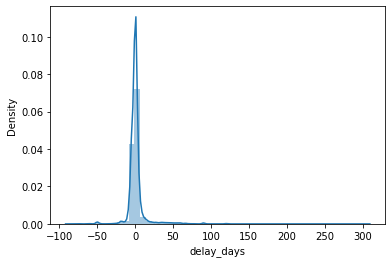

In [22]:
# EDA :)
sns.distplot(y_train)

In [23]:
x_train.merge(y_train,on = x_train.index)

,key_0,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay_days
0,0,0100046614,PRO associates,2019-03-11,2019.0,2018-12-30,2018-12-26,2019-01-29,USD,10404.4,2018-12-30,NAVE,1991819735.0,0,41.0
1,1,0140103400,FOST llc,2019-01-18,2019.0,2019-01-01,2018-12-28,2019-01-31,USD,2248.42,2019-01-01,NAVE,1991819665.0,0,-13.0
2,2,100036060,PANAMEX corporation,2019-04-16,2019.0,2018-12-31,2018-12-28,2019-03-01,USD,289.03,2018-12-31,NAUZ,1991819549.0,0,46.0
3,3,0100034330,MASSY D us,2019-02-08,2019.0,2019-01-01,2018-12-28,2019-01-31,USD,1257.85,2019-01-01,NAVE,1991819553.0,0,8.0
4,4,0200769623,WAL-MAR systems,2019-01-09,2019.0,2018-12-30,2018-12-29,2019-01-14,USD,16224.21,2018-12-30,NAH4,1928535906.0,0,-5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27358,27985,0200769623,WAL-MAR corp,2019-10-23,2019.0,2019-10-07,2019-10-07,2019-10-22,USD,43661.54,2019-10-07,NAH4,1929976286.0,0,1.0
27359,27986,0200571849,US trust,2019-10-25,2019.0,2019-10-07,2019-10-07,2019-10-22,USD,30464.48,2019-10-07,NAA8,1929978520.0,0,3.0
27360,27987,CCCA02,KRAFT corp,2019-11-27,2019.0,2019-10-08,2019-10-07,2019-11-12,USD,14223.6,2019-10-08,NAG2,1929977112.0,0,15.0
27361,27988,0100043903,CARIB trust,2019-10-31,2019.0,2019-10-07,2019-10-07,2019-11-11,USD,14287.2,2019-10-07,NAG2,1990568275.0,0,-11.0


<AxesSubplot:xlabel='total_open_amount', ylabel='delay_days'>

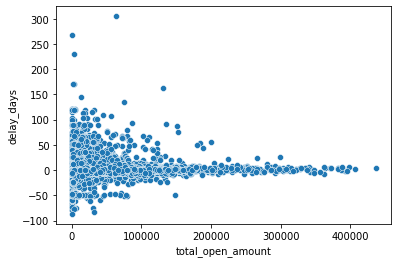

In [24]:
sns.scatterplot(data=x_train.merge(y_train,on = x_train.index), x="total_open_amount", y="delay_days")

In [25]:

x_train.merge(y_train , on = x_train.index).groupby('cust_number')['delay_days'].mean()

cust_number
0100000048    16.500000
0100000051   -13.000000
0100000158    22.500000
0100000217    -2.000000
0100000222    -2.703704
                ...    
CCCA02        10.020710
CCMX11        76.000000
CCU001        10.000000
CCU002         7.194175
CCU013        44.190955
Name: delay_days, Length: 1255, dtype: float64

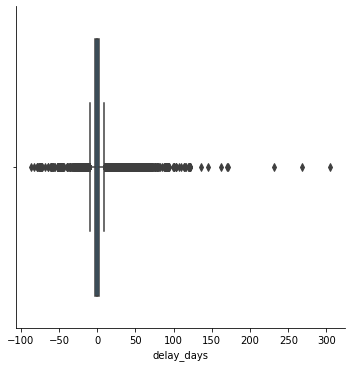

In [26]:
sns.catplot(x='delay_days',kind='box',data=x_train.merge(y_train , on = x_train.index))

In [27]:
# extracting due_in_date into days,year,weekday,month 
x_train['day_of_week_due'] = x_train['due_in_date'].dt.weekday 
x_val['day_of_week_due'] = x_val['due_in_date'].dt.weekday 
x_test['day_of_week_due'] = x_test['due_in_date'].dt.weekday

x_train['day_of_due'] = x_train['due_in_date'].dt.day
x_train['month_of_due'] = x_train['due_in_date'].dt.month
x_train['year_of_due'] = x_train['due_in_date'].dt.year
x_train['due_date_quarter']=x_train['due_in_date'].dt.quarter

x_val['day_of_due'] = x_val['due_in_date'].dt.day
x_val['month_of_due'] = x_val['due_in_date'].dt.month
x_val['year_of_due'] = x_val['due_in_date'].dt.year
x_val['due_date_quarter']=x_val['due_in_date'].dt.quarter


x_test['day_of_due'] = x_test['due_in_date'].dt.day
x_test['month_of_due'] = x_test['due_in_date'].dt.month
x_test['year_of_due'] = x_test['due_in_date'].dt.year
x_test['due_date_quarter']=x_test['due_in_date'].dt.quarter

In [28]:
#drop due_in _date 
x_train.drop(['due_in_date'], axis =1,inplace=True)
x_val.drop(['due_in_date'],axis=1 , inplace=True)
x_test.drop(['due_in_date'],axis=1 , inplace=True)

In [29]:
# extracting posting_date into days,year,weekday,month 
x_train['day_of_week_post'] = x_train['posting_date'].dt.weekday 
x_val['day_of_week_post'] = x_val['posting_date'].dt.weekday 
x_test['day_of_week_post'] = x_test['posting_date'].dt.weekday


x_train['day_of_post'] = x_train['posting_date'].dt.day
x_train['month_of_post'] = x_train['posting_date'].dt.month
x_train['year_of_post'] = x_train['posting_date'].dt.year
x_train['posting_date_quarter']=x_train['posting_date'].dt.quarter

x_val['day_of_post'] = x_val['posting_date'].dt.day
x_val['month_of_post'] = x_val['posting_date'].dt.month
x_val['year_of_post'] = x_val['posting_date'].dt.year
x_val['posting_date_quarter']=x_val['posting_date'].dt.quarter

x_test['day_of_post'] = x_test['posting_date'].dt.day
x_test['month_of_post'] = x_test['posting_date'].dt.month
x_test['year_of_post'] = x_test['posting_date'].dt.year
x_test['posting_date_quarter']=x_test['posting_date'].dt.quarter

In [30]:
#dropping unused columns
x_train.drop(['posting_date'], axis =1,inplace=True)
x_val.drop(['posting_date'],axis=1 , inplace=True)
x_test.drop(['posting_date'],axis=1 , inplace=True)


x_train.drop(['baseline_create_date'], axis =1,inplace=True)
x_val.drop(['baseline_create_date'],axis=1 , inplace=True)
x_test.drop(['baseline_create_date'],axis=1 , inplace=True)

x_train.drop(['clear_date'], axis =1,inplace=True)
x_val.drop(['clear_date'],axis=1 , inplace=True)
x_test.drop(['clear_date'],axis=1 , inplace=True)

x_train.drop(['document_create_date'], axis =1,inplace=True)
x_val.drop(['document_create_date'],axis=1 , inplace=True)
x_test.drop(['document_create_date'],axis=1 , inplace=True)


In [31]:
x_train.head()

,cust_number,name_customer,buisness_year,invoice_currency,total_open_amount,cust_payment_terms,invoice_id,isOpen,day_of_week_due,day_of_due,month_of_due,year_of_due,due_date_quarter,day_of_week_post,day_of_post,month_of_post,year_of_post,posting_date_quarter
0,0100046614,PRO associates,2019.0,USD,10404.4,NAVE,1991819735.0,0,1,29,1,2019,1,6,30,12,2018,4
1,0140103400,FOST llc,2019.0,USD,2248.42,NAVE,1991819665.0,0,3,31,1,2019,1,1,1,1,2019,1
2,100036060,PANAMEX corporation,2019.0,USD,289.03,NAUZ,1991819549.0,0,4,1,3,2019,1,0,31,12,2018,4
3,0100034330,MASSY D us,2019.0,USD,1257.85,NAVE,1991819553.0,0,3,31,1,2019,1,1,1,1,2019,1
4,0200769623,WAL-MAR systems,2019.0,USD,16224.21,NAH4,1928535906.0,0,0,14,1,2019,1,6,30,12,2018,4


In [32]:

# encoding name_customer
cust_name_mean_t = x_train.merge(y_train,on = x_train.index).groupby(['name_customer'])['delay_days'].mean().to_dict()
x_train['name_customer_enc']=x_train['name_customer'].map(cust_name_mean_t)

x_val['name_customer_enc']=x_val['name_customer'].map(cust_name_mean_t)
x_val['name_customer_enc'].fillna(0,inplace=True)

x_test['name_customer_enc']=x_test['name_customer'].map(cust_name_mean_t)
x_test['name_customer_enc'].fillna(0,inplace=True)

In [33]:
# encoding cust_number
cust_number_mean_t = x_train.merge(y_train,on = x_train.index).groupby(['cust_number'])['delay_days'].mean().to_dict()
x_train['cust_number_enc']=x_train['cust_number'].map(cust_number_mean_t)

x_val['cust_number_enc']=x_val['cust_number'].map(cust_number_mean_t)
x_val['cust_number_enc'].fillna(0,inplace=True)

x_test['cust_number_enc']=x_test['cust_number'].map(cust_number_mean_t)
x_test['cust_number_enc'].fillna(0,inplace=True)

In [34]:
# encoding cust_payment_terms
cust_payment_terms_mean_t = x_train.merge(y_train,on = x_train.index).groupby(['cust_payment_terms'])['delay_days'].mean().to_dict()
x_train['cust_payment_terms_enc']=x_train['cust_payment_terms'].map(cust_payment_terms_mean_t)


x_val['cust_payment_terms_enc']=x_val['cust_payment_terms'].map(cust_payment_terms_mean_t)
x_val['cust_payment_terms_enc'].fillna(0,inplace=True)


x_test['cust_payment_terms_enc']=x_test['cust_payment_terms'].map(cust_payment_terms_mean_t)
x_test['cust_payment_terms_enc'].fillna(0,inplace=True)

In [35]:
# categorizing the continuous value og total open amount
x_train['total_open_amount_enc'] = pd.cut(x=x_train['total_open_amount'], bins=[0,20000,40000,60000,80000,100000,800000],labels=[1,2,3,4,5,6])
x_val['total_open_amount_enc'] = pd.cut(x=x_val['total_open_amount'], bins=[0,20000,40000,60000,80000,100000,800000],labels=[1,2,3,4,5,6])
x_test['total_open_amount_enc'] = pd.cut(x=x_test['total_open_amount'], bins=[0,20000,40000,60000,80000,100000,800000],labels=[1,2,3,4,5,6])

In [36]:
#droping total open amount as now we have the encoded version
x_train.drop(['total_open_amount'], axis =1,inplace=True)
x_val.drop(['total_open_amount'],axis=1 , inplace=True)
x_test.drop(['total_open_amount'],axis=1 , inplace=True)

In [37]:
#converting encoded total open amount into integer
x_train['total_open_amount_enc']=x_train['total_open_amount_enc'].astype(np.int64)
x_val['total_open_amount_enc']=x_val['total_open_amount_enc'].astype(np.int64)
x_test['total_open_amount_enc']=x_test['total_open_amount_enc'].astype(np.int64)

In [38]:
#droping cust_number as now we have the encoded version
x_train.drop(['cust_number'], axis =1,inplace=True)
x_val.drop(['cust_number'],axis=1 , inplace=True)
x_test.drop(['cust_number'],axis=1 , inplace=True)

In [39]:
#droping name_customer as now we have the encoded version
x_train.drop(['name_customer'], axis =1,inplace=True)
x_val.drop(['name_customer'],axis=1 , inplace=True)
x_test.drop(['name_customer'],axis=1 , inplace=True)

In [40]:
# dropping unused columns
x_train['buisness_year']=x_train['buisness_year'].astype(np.int64)
x_val['buisness_year']=x_val['buisness_year'].astype(np.int64)
x_test['buisness_year']=x_test['buisness_year'].astype(np.int64)

In [41]:
# dropping unused columns
x_train.drop(['invoice_currency'], axis =1,inplace=True)
x_val.drop(['invoice_currency'],axis=1 , inplace=True)
x_test.drop(['invoice_currency'],axis=1 , inplace=True)

In [42]:
# below is again basic pre processing before we start building our model
x_train.drop(['cust_payment_terms'], axis =1,inplace=True)
x_val.drop(['cust_payment_terms'],axis=1 , inplace=True)
x_test.drop(['cust_payment_terms'],axis=1 , inplace=True)

In [43]:
x_train.drop(['invoice_id'], axis =1,inplace=True)
x_val.drop(['invoice_id'],axis=1 , inplace=True)
x_test.drop(['invoice_id'],axis=1 , inplace=True)

In [44]:
x_train.drop(['isOpen'], axis =1,inplace=True)
x_val.drop(['isOpen'],axis=1 , inplace=True)
x_test.drop(['isOpen'],axis=1 , inplace=True)

In [45]:
x_train.drop(['buisness_year'], axis =1,inplace=True)
x_val.drop(['buisness_year'],axis=1 , inplace=True)
x_test.drop(['buisness_year'],axis=1 , inplace=True)

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

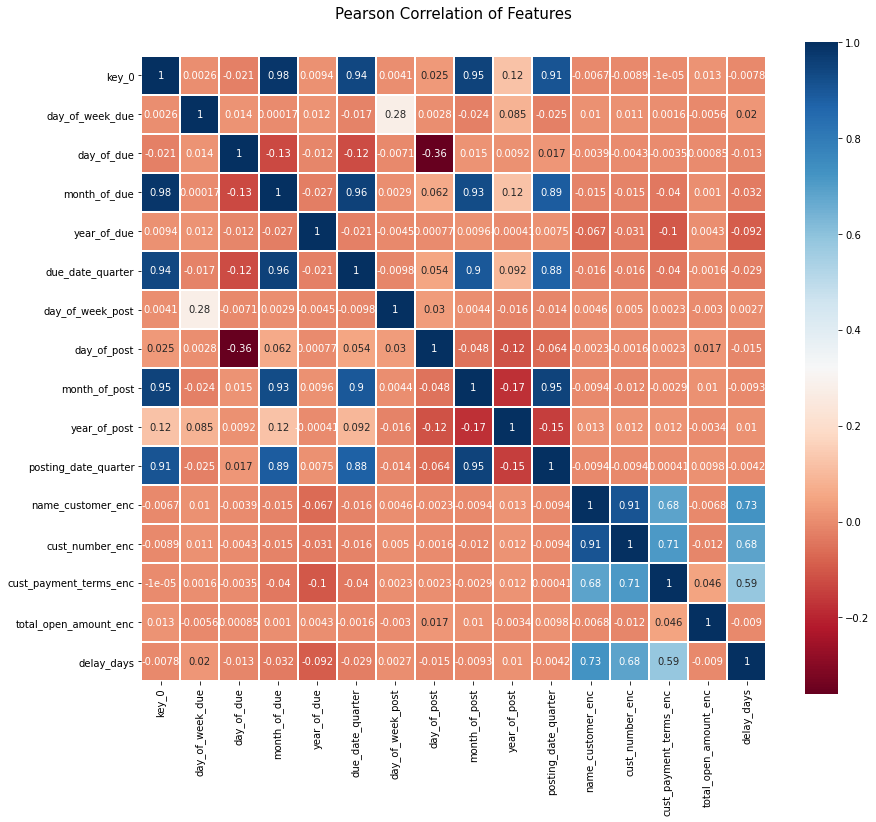

In [46]:
#feature selection
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(x_train.merge(y_train , on = x_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)


In [47]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(0.8)
sel.fit(x_train)

VarianceThreshold(threshold=0.8)

In [48]:
sel.variances_


array([3.53039947e+00, 7.46855308e+01, 7.19799962e+00, 1.46177459e-04,
       8.64191416e-01, 3.25047384e+00, 7.82955236e+01, 7.09923854e+00,
       4.65596737e-03, 7.57989947e-01, 7.62396900e+01, 6.72090278e+01,
       4.95462171e+01, 2.28664956e+00])

In [49]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27363 entries, 0 to 27989
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day_of_week_due         27363 non-null  int64  
 1   day_of_due              27363 non-null  int64  
 2   month_of_due            27363 non-null  int64  
 3   year_of_due             27363 non-null  int64  
 4   due_date_quarter        27363 non-null  int64  
 5   day_of_week_post        27363 non-null  int64  
 6   day_of_post             27363 non-null  int64  
 7   month_of_post           27363 non-null  int64  
 8   year_of_post            27363 non-null  int64  
 9   posting_date_quarter    27363 non-null  int64  
 10  name_customer_enc       27363 non-null  float64
 11  cust_number_enc         27363 non-null  float64
 12  cust_payment_terms_enc  27363 non-null  float64
 13  total_open_amount_enc   27363 non-null  int64  
dtypes: float64(3), int64(11)
memory usage:

In [50]:
x_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5864 entries, 27990 to 33990
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day_of_week_due         5864 non-null   int64  
 1   day_of_due              5864 non-null   int64  
 2   month_of_due            5864 non-null   int64  
 3   year_of_due             5864 non-null   int64  
 4   due_date_quarter        5864 non-null   int64  
 5   day_of_week_post        5864 non-null   int64  
 6   day_of_post             5864 non-null   int64  
 7   month_of_post           5864 non-null   int64  
 8   year_of_post            5864 non-null   int64  
 9   posting_date_quarter    5864 non-null   int64  
 10  name_customer_enc       5864 non-null   float64
 11  cust_number_enc         5864 non-null   float64
 12  cust_payment_terms_enc  5864 non-null   float64
 13  total_open_amount_enc   5864 non-null   int64  
dtypes: float64(3), int64(11)
memory usa

In [51]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5864 entries, 33991 to 39999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day_of_week_due         5864 non-null   int64  
 1   day_of_due              5864 non-null   int64  
 2   month_of_due            5864 non-null   int64  
 3   year_of_due             5864 non-null   int64  
 4   due_date_quarter        5864 non-null   int64  
 5   day_of_week_post        5864 non-null   int64  
 6   day_of_post             5864 non-null   int64  
 7   month_of_post           5864 non-null   int64  
 8   year_of_post            5864 non-null   int64  
 9   posting_date_quarter    5864 non-null   int64  
 10  name_customer_enc       5864 non-null   float64
 11  cust_number_enc         5864 non-null   float64
 12  cust_payment_terms_enc  5864 non-null   float64
 13  total_open_amount_enc   5864 non-null   int64  
dtypes: float64(3), int64(11)
memory usa

In [52]:
#modelling
from sklearn.linear_model import LinearRegression
base_model = LinearRegression()
base_model.fit(x_train, y_train)

LinearRegression()

In [53]:
y_predict = base_model.predict(x_val)

In [54]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_val, y_predict, squared=False)

6.127428930752542

In [55]:
met = pd.DataFrame(zip(y_predict , y_test),columns=['Predicted','Actuals'])

In [56]:
# tree model
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0 , max_depth=5)

In [57]:
regressor.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=0)

In [58]:
y_predict2 = regressor.predict(x_val)

In [59]:
mean_squared_error(y_val, y_predict2, squared=False)

6.701148608458941

In [60]:
# confirming that the model is not getting overfitted
y_predict_test = regressor.predict(x_test)
mean_squared_error(y_test, y_predict_test, squared=False)

8.839270496566796

In [61]:
from sklearn.metrics import r2_score
r2_score(y_test, y_predict_test)

0.2367891812308196

In [62]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27363 entries, 0 to 27989
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day_of_week_due         27363 non-null  int64  
 1   day_of_due              27363 non-null  int64  
 2   month_of_due            27363 non-null  int64  
 3   year_of_due             27363 non-null  int64  
 4   due_date_quarter        27363 non-null  int64  
 5   day_of_week_post        27363 non-null  int64  
 6   day_of_post             27363 non-null  int64  
 7   month_of_post           27363 non-null  int64  
 8   year_of_post            27363 non-null  int64  
 9   posting_date_quarter    27363 non-null  int64  
 10  name_customer_enc       27363 non-null  float64
 11  cust_number_enc         27363 non-null  float64
 12  cust_payment_terms_enc  27363 non-null  float64
 13  total_open_amount_enc   27363 non-null  int64  
dtypes: float64(3), int64(11)
memory usage:

In [63]:
x_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5864 entries, 27990 to 33990
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day_of_week_due         5864 non-null   int64  
 1   day_of_due              5864 non-null   int64  
 2   month_of_due            5864 non-null   int64  
 3   year_of_due             5864 non-null   int64  
 4   due_date_quarter        5864 non-null   int64  
 5   day_of_week_post        5864 non-null   int64  
 6   day_of_post             5864 non-null   int64  
 7   month_of_post           5864 non-null   int64  
 8   year_of_post            5864 non-null   int64  
 9   posting_date_quarter    5864 non-null   int64  
 10  name_customer_enc       5864 non-null   float64
 11  cust_number_enc         5864 non-null   float64
 12  cust_payment_terms_enc  5864 non-null   float64
 13  total_open_amount_enc   5864 non-null   int64  
dtypes: float64(3), int64(11)
memory usa

In [64]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5864 entries, 33991 to 39999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day_of_week_due         5864 non-null   int64  
 1   day_of_due              5864 non-null   int64  
 2   month_of_due            5864 non-null   int64  
 3   year_of_due             5864 non-null   int64  
 4   due_date_quarter        5864 non-null   int64  
 5   day_of_week_post        5864 non-null   int64  
 6   day_of_post             5864 non-null   int64  
 7   month_of_post           5864 non-null   int64  
 8   year_of_post            5864 non-null   int64  
 9   posting_date_quarter    5864 non-null   int64  
 10  name_customer_enc       5864 non-null   float64
 11  cust_number_enc         5864 non-null   float64
 12  cust_payment_terms_enc  5864 non-null   float64
 13  total_open_amount_enc   5864 non-null   int64  
dtypes: float64(3), int64(11)
memory usa

In [65]:
# predicting test with null values of clear date
test.head()

,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,0200769623,WAL-MAR corp,NaN,2020.0,2020-03-05,20200305,20200320.0,USD,27866.20,20200305.0,NAH4,1.930605e+09,1
1,0200769623,WAL-MAR corporation,NaN,2020.0,2020-03-24,20200323,20200408.0,USD,61088.15,20200324.0,NAH4,1.930688e+09,1
2,0200799367,MCL foundation,NaN,2020.0,2020-03-04,20200304,20200319.0,USD,70262.73,20200304.0,NAA8,1.930599e+09,1
3,CCCA02,KRAFT trust,NaN,2020.0,2020-03-08,20200306,20200412.0,USD,47809.68,20200308.0,NAG2,1.930615e+09,1
4,0200803720,DEC corporation,NaN,2020.0,2020-04-10,20200410,20200424.0,USD,2403.92,20200401.0,NAM4,1.930773e+09,1


In [66]:
#checking for null values
test.isna().sum()

cust_number                 0
name_customer               0
clear_date              10000
buisness_year               0
posting_date                0
document_create_date        0
due_in_date                 0
invoice_currency            0
total_open_amount           0
baseline_create_date        0
cust_payment_terms          0
invoice_id                  0
isOpen                      0
dtype: int64

In [67]:
x_final=test

In [68]:
#converting dtypes to date_time objects :)
test['document_create_date']=pd.to_datetime(test['document_create_date'], format='%Y%m%d')
test['due_in_date']=pd.to_datetime(test.due_in_date,format='%Y%m%d')
test['posting_date']=pd.to_datetime(test['posting_date'], format='%Y %m %d')
test['baseline_create_date']=pd.to_datetime(test.baseline_create_date,format='%Y%m%d')
test['clear_date']= pd.to_datetime(test['clear_date'])
test.dtypes

cust_number                     object
name_customer                   object
clear_date              datetime64[ns]
buisness_year                  float64
posting_date            datetime64[ns]
document_create_date    datetime64[ns]
due_in_date             datetime64[ns]
invoice_currency                object
total_open_amount              float64
baseline_create_date    datetime64[ns]
cust_payment_terms              object
invoice_id                     float64
isOpen                           int64
dtype: object

In [69]:
# extracting due_in_date into days,year,weekday,month 
test['day_of_week_due'] = test['due_in_date'].dt.weekday 
test['day_of_due'] = test['due_in_date'].dt.day
test['month_of_due'] = test['due_in_date'].dt.month
test['year_of_due'] = test['due_in_date'].dt.year
test['due_date_quarter']=test['due_in_date'].dt.quarter

In [70]:
# droping due_in_date
test.drop(['due_in_date'], axis =1,inplace=True)

In [71]:
# extracting posting_date into days,year,weekday,month 
test['day_of_week_post'] = test['posting_date'].dt.weekday 
test['day_of_post'] = test['posting_date'].dt.day
test['month_of_post'] = test['posting_date'].dt.month
test['year_of_post'] = test['posting_date'].dt.year
test['posting_date_quarter']=test['posting_date'].dt.quarter


In [72]:
# droping posting_date
test.drop(['posting_date'], axis =1,inplace=True)

In [73]:

# encoding name_customer
test['name_customer_enc']=test['name_customer'].map(cust_name_mean_t)
test['name_customer_enc'].fillna(0,inplace=True)

test.drop(['name_customer'], axis =1,inplace=True)

In [74]:
# encoding cust_number

test['cust_number_enc']=test['cust_number'].map(cust_number_mean_t)
test['cust_number_enc'].fillna(0,inplace=True)
test.drop(['cust_number'], axis =1,inplace=True)

In [75]:
# encoding cust_payment_terms
test['cust_payment_terms_enc']=test['cust_payment_terms'].map(cust_payment_terms_mean_t)
test['cust_payment_terms_enc'].fillna(0,inplace=True)
test.drop(['cust_payment_terms'], axis =1,inplace=True)



In [76]:
# categorizing the continuous value of total open amount
test['total_open_amount_enc'] = pd.cut(x=test['total_open_amount'], bins=[0,20000,40000,60000,80000,100000,800000],labels=[1,2,3,4,5,6])

In [77]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   clear_date              0 non-null      datetime64[ns]
 1   buisness_year           10000 non-null  float64       
 2   document_create_date    10000 non-null  datetime64[ns]
 3   invoice_currency        10000 non-null  object        
 4   total_open_amount       10000 non-null  float64       
 5   baseline_create_date    10000 non-null  datetime64[ns]
 6   invoice_id              10000 non-null  float64       
 7   isOpen                  10000 non-null  int64         
 8   day_of_week_due         10000 non-null  int64         
 9   day_of_due              10000 non-null  int64         
 10  month_of_due            10000 non-null  int64         
 11  year_of_due             10000 non-null  int64         
 12  due_date_quarter        10000 non-null  int64  

In [78]:
# dropping  columns
test.drop(['document_create_date'], axis =1,inplace=True)
test.drop(['clear_date'], axis =1,inplace=True)
test.drop(['invoice_currency'], axis =1,inplace=True)
test.drop(['total_open_amount'], axis =1,inplace=True)
test.drop(['baseline_create_date'], axis =1,inplace=True)
test.drop(['invoice_id'], axis =1,inplace=True)
test.drop(['isOpen'], axis =1,inplace=True)

In [79]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   buisness_year           10000 non-null  float64 
 1   day_of_week_due         10000 non-null  int64   
 2   day_of_due              10000 non-null  int64   
 3   month_of_due            10000 non-null  int64   
 4   year_of_due             10000 non-null  int64   
 5   due_date_quarter        10000 non-null  int64   
 6   day_of_week_post        10000 non-null  int64   
 7   day_of_post             10000 non-null  int64   
 8   month_of_post           10000 non-null  int64   
 9   year_of_post            10000 non-null  int64   
 10  posting_date_quarter    10000 non-null  int64   
 11  name_customer_enc       10000 non-null  float64 
 12  cust_number_enc         10000 non-null  float64 
 13  cust_payment_terms_enc  10000 non-null  float64 
 14  total_open_amount_enc  

In [80]:
# converting total_open_amount_enc to integer
test['total_open_amount_enc']=test['total_open_amount_enc'].astype(np.int64)

In [81]:
#dropping buisness_year as it is of no use
test.drop(['buisness_year'], axis =1,inplace=True)

In [82]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day_of_week_due         10000 non-null  int64  
 1   day_of_due              10000 non-null  int64  
 2   month_of_due            10000 non-null  int64  
 3   year_of_due             10000 non-null  int64  
 4   due_date_quarter        10000 non-null  int64  
 5   day_of_week_post        10000 non-null  int64  
 6   day_of_post             10000 non-null  int64  
 7   month_of_post           10000 non-null  int64  
 8   year_of_post            10000 non-null  int64  
 9   posting_date_quarter    10000 non-null  int64  
 10  name_customer_enc       10000 non-null  float64
 11  cust_number_enc         10000 non-null  float64
 12  cust_payment_terms_enc  10000 non-null  float64
 13  total_open_amount_enc   10000 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 

In [83]:
#passing the test set to the model
finalSet=base_model.predict(test)

In [84]:
final_result = regressor.predict(test)

In [85]:
finalSet=pd.Series(finalSet,name='pred_delay_days')

In [86]:
test.reset_index(drop=True,inplace=True)

In [87]:
# this is the delay in days that is predicted by the model
finalSet

0      -29.309002
1      -29.546642
2      -25.728116
3      -16.184565
4      -32.601459
          ...    
9995   -26.089089
9996   -26.877490
9997   -24.387019
9998   -26.936123
9999   -28.827359
Name: pred_delay_days, Length: 10000, dtype: float64

In [88]:
newTest

,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,0200769623,WAL-MAR corp,NaN,2020.0,2020-03-05,20200305,20200320.0,USD,27866.20,20200305.0,NAH4,1.930605e+09,1
1,0200769623,WAL-MAR corporation,NaN,2020.0,2020-03-24,20200323,20200408.0,USD,61088.15,20200324.0,NAH4,1.930688e+09,1
2,0200799367,MCL foundation,NaN,2020.0,2020-03-04,20200304,20200319.0,USD,70262.73,20200304.0,NAA8,1.930599e+09,1
3,CCCA02,KRAFT trust,NaN,2020.0,2020-03-08,20200306,20200412.0,USD,47809.68,20200308.0,NAG2,1.930615e+09,1
4,0200803720,DEC corporation,NaN,2020.0,2020-04-10,20200410,20200424.0,USD,2403.92,20200401.0,NAM4,1.930773e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0200747369,SCHNU co,NaN,2020.0,2020-04-23,20200424,20200508.0,USD,53835.00,20200423.0,NAA8,1.930823e+09,1
9996,0200759878,SA llc,NaN,2020.0,2020-04-19,20200418,20200504.0,USD,7215.97,20200419.0,NAH4,1.930801e+09,1
9997,0200772670,ASSOCIAT associates,NaN,2020.0,2020-04-15,20200415,20200430.0,USD,249.74,20200415.0,NAU5,1.930789e+09,1
9998,0200729942,SA trust,NaN,2020.0,2020-03-17,20200317,20200401.0,USD,4018.90,20200317.0,NAA8,1.930656e+09,1


In [89]:
# merging intial testset to the predicted delay days
Final = newTest.merge(finalSet , on = newTest.index )

In [90]:
Final.head()

,key_0,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,pred_delay_days
0,0,0200769623,WAL-MAR corp,NaN,2020.0,2020-03-05,20200305,20200320.0,USD,27866.20,20200305.0,NAH4,1.930605e+09,1,-29.309002
1,1,0200769623,WAL-MAR corporation,NaN,2020.0,2020-03-24,20200323,20200408.0,USD,61088.15,20200324.0,NAH4,1.930688e+09,1,-29.546642
2,2,0200799367,MCL foundation,NaN,2020.0,2020-03-04,20200304,20200319.0,USD,70262.73,20200304.0,NAA8,1.930599e+09,1,-25.728116
3,3,CCCA02,KRAFT trust,NaN,2020.0,2020-03-08,20200306,20200412.0,USD,47809.68,20200308.0,NAG2,1.930615e+09,1,-16.184565
4,4,0200803720,DEC corporation,NaN,2020.0,2020-04-10,20200410,20200424.0,USD,2403.92,20200401.0,NAM4,1.930773e+09,1,-32.601459


In [91]:
# rounding off the predicted delay days
Final['pred_delay_days']=Final['pred_delay_days'].round(0)

In [92]:
Final

,key_0,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,pred_delay_days
0,0,0200769623,WAL-MAR corp,NaN,2020.0,2020-03-05,20200305,20200320.0,USD,27866.20,20200305.0,NAH4,1.930605e+09,1,-29.0
1,1,0200769623,WAL-MAR corporation,NaN,2020.0,2020-03-24,20200323,20200408.0,USD,61088.15,20200324.0,NAH4,1.930688e+09,1,-30.0
2,2,0200799367,MCL foundation,NaN,2020.0,2020-03-04,20200304,20200319.0,USD,70262.73,20200304.0,NAA8,1.930599e+09,1,-26.0
3,3,CCCA02,KRAFT trust,NaN,2020.0,2020-03-08,20200306,20200412.0,USD,47809.68,20200308.0,NAG2,1.930615e+09,1,-16.0
4,4,0200803720,DEC corporation,NaN,2020.0,2020-04-10,20200410,20200424.0,USD,2403.92,20200401.0,NAM4,1.930773e+09,1,-33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,0200747369,SCHNU co,NaN,2020.0,2020-04-23,20200424,20200508.0,USD,53835.00,20200423.0,NAA8,1.930823e+09,1,-26.0
9996,9996,0200759878,SA llc,NaN,2020.0,2020-04-19,20200418,20200504.0,USD,7215.97,20200419.0,NAH4,1.930801e+09,1,-27.0
9997,9997,0200772670,ASSOCIAT associates,NaN,2020.0,2020-04-15,20200415,20200430.0,USD,249.74,20200415.0,NAU5,1.930789e+09,1,-24.0
9998,9998,0200729942,SA trust,NaN,2020.0,2020-03-17,20200317,20200401.0,USD,4018.90,20200317.0,NAA8,1.930656e+09,1,-27.0


In [93]:
Final.head()

,key_0,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,pred_delay_days
0,0,0200769623,WAL-MAR corp,NaN,2020.0,2020-03-05,20200305,20200320.0,USD,27866.20,20200305.0,NAH4,1.930605e+09,1,-29.0
1,1,0200769623,WAL-MAR corporation,NaN,2020.0,2020-03-24,20200323,20200408.0,USD,61088.15,20200324.0,NAH4,1.930688e+09,1,-30.0
2,2,0200799367,MCL foundation,NaN,2020.0,2020-03-04,20200304,20200319.0,USD,70262.73,20200304.0,NAA8,1.930599e+09,1,-26.0
3,3,CCCA02,KRAFT trust,NaN,2020.0,2020-03-08,20200306,20200412.0,USD,47809.68,20200308.0,NAG2,1.930615e+09,1,-16.0
4,4,0200803720,DEC corporation,NaN,2020.0,2020-04-10,20200410,20200424.0,USD,2403.92,20200401.0,NAM4,1.930773e+09,1,-33.0


In [94]:
#converting due_in_date to datetime with a given format so that it can be added to predicted delay days
Final['due_in_date']= pd.to_datetime(Final['due_in_date'], format="%Y%m%d")

In [95]:
Final

,key_0,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,pred_delay_days
0,0,0200769623,WAL-MAR corp,NaN,2020.0,2020-03-05,20200305,2020-03-20,USD,27866.20,20200305.0,NAH4,1.930605e+09,1,-29.0
1,1,0200769623,WAL-MAR corporation,NaN,2020.0,2020-03-24,20200323,2020-04-08,USD,61088.15,20200324.0,NAH4,1.930688e+09,1,-30.0
2,2,0200799367,MCL foundation,NaN,2020.0,2020-03-04,20200304,2020-03-19,USD,70262.73,20200304.0,NAA8,1.930599e+09,1,-26.0
3,3,CCCA02,KRAFT trust,NaN,2020.0,2020-03-08,20200306,2020-04-12,USD,47809.68,20200308.0,NAG2,1.930615e+09,1,-16.0
4,4,0200803720,DEC corporation,NaN,2020.0,2020-04-10,20200410,2020-04-24,USD,2403.92,20200401.0,NAM4,1.930773e+09,1,-33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,0200747369,SCHNU co,NaN,2020.0,2020-04-23,20200424,2020-05-08,USD,53835.00,20200423.0,NAA8,1.930823e+09,1,-26.0
9996,9996,0200759878,SA llc,NaN,2020.0,2020-04-19,20200418,2020-05-04,USD,7215.97,20200419.0,NAH4,1.930801e+09,1,-27.0
9997,9997,0200772670,ASSOCIAT associates,NaN,2020.0,2020-04-15,20200415,2020-04-30,USD,249.74,20200415.0,NAU5,1.930789e+09,1,-24.0
9998,9998,0200729942,SA trust,NaN,2020.0,2020-03-17,20200317,2020-04-01,USD,4018.90,20200317.0,NAA8,1.930656e+09,1,-27.0


In [96]:
# evaluating clear_date by adding due_in_date + predicted delay days
Final['clear_date']= Final['due_in_date'] + pd.to_timedelta(Final['pred_delay_days'], unit='D')

In [97]:
Final

,key_0,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,pred_delay_days
0,0,0200769623,WAL-MAR corp,2020-02-20,2020.0,2020-03-05,20200305,2020-03-20,USD,27866.20,20200305.0,NAH4,1.930605e+09,1,-29.0
1,1,0200769623,WAL-MAR corporation,2020-03-09,2020.0,2020-03-24,20200323,2020-04-08,USD,61088.15,20200324.0,NAH4,1.930688e+09,1,-30.0
2,2,0200799367,MCL foundation,2020-02-22,2020.0,2020-03-04,20200304,2020-03-19,USD,70262.73,20200304.0,NAA8,1.930599e+09,1,-26.0
3,3,CCCA02,KRAFT trust,2020-03-27,2020.0,2020-03-08,20200306,2020-04-12,USD,47809.68,20200308.0,NAG2,1.930615e+09,1,-16.0
4,4,0200803720,DEC corporation,2020-03-22,2020.0,2020-04-10,20200410,2020-04-24,USD,2403.92,20200401.0,NAM4,1.930773e+09,1,-33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,0200747369,SCHNU co,2020-04-12,2020.0,2020-04-23,20200424,2020-05-08,USD,53835.00,20200423.0,NAA8,1.930823e+09,1,-26.0
9996,9996,0200759878,SA llc,2020-04-07,2020.0,2020-04-19,20200418,2020-05-04,USD,7215.97,20200419.0,NAH4,1.930801e+09,1,-27.0
9997,9997,0200772670,ASSOCIAT associates,2020-04-06,2020.0,2020-04-15,20200415,2020-04-30,USD,249.74,20200415.0,NAU5,1.930789e+09,1,-24.0
9998,9998,0200729942,SA trust,2020-03-05,2020.0,2020-03-17,20200317,2020-04-01,USD,4018.90,20200317.0,NAA8,1.930656e+09,1,-27.0


In [98]:
Final.head()

,key_0,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,pred_delay_days
0,0,0200769623,WAL-MAR corp,2020-02-20,2020.0,2020-03-05,20200305,2020-03-20,USD,27866.20,20200305.0,NAH4,1.930605e+09,1,-29.0
1,1,0200769623,WAL-MAR corporation,2020-03-09,2020.0,2020-03-24,20200323,2020-04-08,USD,61088.15,20200324.0,NAH4,1.930688e+09,1,-30.0
2,2,0200799367,MCL foundation,2020-02-22,2020.0,2020-03-04,20200304,2020-03-19,USD,70262.73,20200304.0,NAA8,1.930599e+09,1,-26.0
3,3,CCCA02,KRAFT trust,2020-03-27,2020.0,2020-03-08,20200306,2020-04-12,USD,47809.68,20200308.0,NAG2,1.930615e+09,1,-16.0
4,4,0200803720,DEC corporation,2020-03-22,2020.0,2020-04-10,20200410,2020-04-24,USD,2403.92,20200401.0,NAM4,1.930773e+09,1,-33.0


In [99]:
Final.dtypes

key_0                            int64
cust_number                     object
name_customer                   object
clear_date              datetime64[ns]
buisness_year                  float64
posting_date                    object
document_create_date             int64
due_in_date             datetime64[ns]
invoice_currency                object
total_open_amount              float64
baseline_create_date           float64
cust_payment_terms              object
invoice_id                     float64
isOpen                           int64
pred_delay_days                float64
dtype: object

In [100]:
# converting predicted delay days intp integer so that we can do bucketization
Final['pred_delay_days']=Final['pred_delay_days'].astype(int)

In [101]:
Final

,key_0,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,pred_delay_days
0,0,0200769623,WAL-MAR corp,2020-02-20,2020.0,2020-03-05,20200305,2020-03-20,USD,27866.20,20200305.0,NAH4,1.930605e+09,1,-29
1,1,0200769623,WAL-MAR corporation,2020-03-09,2020.0,2020-03-24,20200323,2020-04-08,USD,61088.15,20200324.0,NAH4,1.930688e+09,1,-30
2,2,0200799367,MCL foundation,2020-02-22,2020.0,2020-03-04,20200304,2020-03-19,USD,70262.73,20200304.0,NAA8,1.930599e+09,1,-26
3,3,CCCA02,KRAFT trust,2020-03-27,2020.0,2020-03-08,20200306,2020-04-12,USD,47809.68,20200308.0,NAG2,1.930615e+09,1,-16
4,4,0200803720,DEC corporation,2020-03-22,2020.0,2020-04-10,20200410,2020-04-24,USD,2403.92,20200401.0,NAM4,1.930773e+09,1,-33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,0200747369,SCHNU co,2020-04-12,2020.0,2020-04-23,20200424,2020-05-08,USD,53835.00,20200423.0,NAA8,1.930823e+09,1,-26
9996,9996,0200759878,SA llc,2020-04-07,2020.0,2020-04-19,20200418,2020-05-04,USD,7215.97,20200419.0,NAH4,1.930801e+09,1,-27
9997,9997,0200772670,ASSOCIAT associates,2020-04-06,2020.0,2020-04-15,20200415,2020-04-30,USD,249.74,20200415.0,NAU5,1.930789e+09,1,-24
9998,9998,0200729942,SA trust,2020-03-05,2020.0,2020-03-17,20200317,2020-04-01,USD,4018.90,20200317.0,NAA8,1.930656e+09,1,-27


In [102]:
Final.dtypes

key_0                            int64
cust_number                     object
name_customer                   object
clear_date              datetime64[ns]
buisness_year                  float64
posting_date                    object
document_create_date             int64
due_in_date             datetime64[ns]
invoice_currency                object
total_open_amount              float64
baseline_create_date           float64
cust_payment_terms              object
invoice_id                     float64
isOpen                           int64
pred_delay_days                  int32
dtype: object

In [103]:
Final['pred_delay_days'].value_counts()

-29    1872
-26    1550
-27    1539
-30    1314
-25     721
-28     644
-24     335
-32     235
-23     216
-22     184
-33     181
-31     149
-21     130
-36     102
-35     101
-34      83
-20      72
-17      69
-38      56
-19      53
-18      51
-16      36
-37      34
-39      33
-40      23
 22      19
-15      18
 23      15
 21      14
-41      13
-14      11
 24      10
-45      10
-10       9
-11       8
-6        6
-42       6
-43       5
-48       5
-12       5
 20       5
-9        5
-44       4
-49       4
-7        3
-46       3
-50       3
-13       3
 31       3
 30       3
 0        2
 27       2
-5        2
-51       2
-3        2
-53       2
-65       1
 32       1
 9        1
-63       1
 10       1
-54       1
-91       1
 11       1
-67       1
-66       1
 83       1
-4        1
-8        1
 5        1
-73       1
Name: pred_delay_days, dtype: int64

In [104]:
#bucketization
Final.loc[Final['pred_delay_days']>45, 'bucket_ageing'] ='45<'
Final.loc[Final['pred_delay_days']<=45, 'bucket_ageing'] ='31-45'
Final.loc[Final['pred_delay_days']<=30, 'bucket_ageing'] ='16-30'
Final.loc[Final['pred_delay_days']<=15, 'bucket_ageing'] ='0-15'
Final.loc[Final['pred_delay_days']<=0, 'bucket_ageing'] ='<0'

In [106]:
Final.head(50)

,key_0,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,pred_delay_days,bucket_ageing
0,0,0200769623,WAL-MAR corp,2020-02-20,2020.0,2020-03-05,20200305,2020-03-20,USD,27866.20,20200305.0,NAH4,1.930605e+09,1,-29,<0
1,1,0200769623,WAL-MAR corporation,2020-03-09,2020.0,2020-03-24,20200323,2020-04-08,USD,61088.15,20200324.0,NAH4,1.930688e+09,1,-30,<0
2,2,0200799367,MCL foundation,2020-02-22,2020.0,2020-03-04,20200304,2020-03-19,USD,70262.73,20200304.0,NAA8,1.930599e+09,1,-26,<0
3,3,CCCA02,KRAFT trust,2020-03-27,2020.0,2020-03-08,20200306,2020-04-12,USD,47809.68,20200308.0,NAG2,1.930615e+09,1,-16,<0
4,4,0200803720,DEC corporation,2020-03-22,2020.0,2020-04-10,20200410,2020-04-24,USD,2403.92,20200401.0,NAM4,1.930773e+09,1,-33,<0
5,5,200759878,SA in,2020-03-07,2020.0,2020-03-18,20200318,2020-04-02,USD,20374.87,20200318.0,NAH4,1.930667e+09,1,-26,<0
6,6,0200722444,PERFOR trust,2020-04-17,2020.0,2020-04-28,20200428,2020-05-13,USD,23830.59,20200428.0,NAA8,1.930834e+09,1,-26,<0
7,7,0200424504,M,2020-04-18,2020.0,2020-04-28,20200427,2020-05-15,USD,19827.63,20200515.0,NACH,1.930830e+09,1,-27,<0
8,8,0200769623,WAL-MAR associates,2020-04-13,2020.0,2020-04-28,20200427,2020-05-13,USD,25297.58,20200428.0,NAH4,1.930831e+09,1,-30,<0
9,9,0200769623,WAL-MAR trust,2020-03-16,2020.0,2020-03-31,20200330,2020-04-15,USD,14257.78,20200331.0,NAH4,1.930723e+09,1,-30,<0
